# Assignment 3 (Wali Ullah-0947)

In [1]:
#!pip install prob140
#!pip install datascience

In [2]:
import numpy as np
from datascience import *
from prob140 import *
import numpy as np
from datascience import *
from prob140 import *
import array
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from scipy.stats import norm
%matplotlib inline

# Discrete Random Variable

# Joint PDF

Suppose, we have two dices, one of which is fair and each outcome has a probability of 1/6. The other die is biased towards larger numbers of spots. The distribution of the number of spots on the biased die is:

value            probability

1                   1/16

2                   1/16

3                   3/16

4                   3/16

5                   4/16

6                   4/16


# Making Joint PDF

In [3]:
spots = np.arange(1, 7)                     # possible values of F; same set for S
s=[1,2,3,4,5,6]
f=[1,2,3,4,5,6]
fair = (1/6) * np.ones(6)  
biased = make_array(1/16, 1/16, 3/16, 3/16, 4/16, 4/16)

def joint_probability(i, j):                # returns P(F = i, S = j)
    return fair.item(i-1) * biased.item(j-1)

# joint distribution table of F and S
joint_table = Table().values('F', spots, 'S', spots).probability_function(joint_probability)
joint_table

,F=1,F=2,F=3,F=4,F=5,F=6
S=6,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
S=5,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
S=4,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
S=3,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
S=2,0.010417,0.010417,0.010417,0.010417,0.010417,0.010417
S=1,0.010417,0.010417,0.010417,0.010417,0.010417,0.010417


In [4]:
#Joint Probabilities of an event

Example#1: Find probability of {S>F+2}:

Define the indicator function of the event {S>F+2} and then use the event method.

In [5]:
def indicator(i, j):
    return j > i + 2

joint_table.event(indicator, 'F', 'S')

P(Event) = 0.2395833333333333


,F=1,F=2,F=3,F=4,F=5,F=6
S=6,0.041667,0.041667,0.041667,,,
S=5,0.041667,0.041667,,,,
S=4,0.03125,,,,,
S=3,,,,,,
S=2,,,,,,
S=1,,,,,,


Example 2: The chance that the numbers on the two dice differ by no more than 1:

find P(|F−S|≤1).  

In [6]:
def indicator_absdiff_atmost_1(i, j):
    return abs(i - j) <= 1

joint_table.event(indicator_absdiff_atmost_1, 'F', 'S')

P(Event) = 0.44791666666666674


,F=1,F=2,F=3,F=4,F=5,F=6
S=6,,,,,0.041667,0.041667
S=5,,,,0.041667,0.041667,0.041667
S=4,,,0.03125,0.03125,0.03125,
S=3,,0.03125,0.03125,0.03125,,
S=2,0.010417,0.010417,0.010417,,,
S=1,0.010417,0.010417,,,,


Example 3: The probability that the sum of the numbers on the two dice is 7:

The event {F+S=7} consists of all possible pairs (i,j) such that i+j=7. 

In [7]:
def indicator_sum_7(i, j):
    return i + j == 7

joint_table.event(indicator_sum_7, 'F', 'S')

P(Event) = 0.16666666666666663


,F=1,F=2,F=3,F=4,F=5,F=6
S=6,0.041667,,,,,
S=5,,0.041667,,,,
S=4,,,0.03125,,,
S=3,,,,0.03125,,
S=2,,,,,0.010417,
S=1,,,,,,0.010417


# Making Marginal Distribution

Let’s look at the event {F=1}. The probability of this event is the marginal probability of {F=1}

In [8]:
def indicator_F_equals_0(i, j):
    return i == 1

joint_table.event(indicator_F_equals_0, 'F', 'S')

P(Event) = 0.16666666666666666


,F=1,F=2,F=3,F=4,F=5,F=6
S=6,0.041667,,,,,
S=5,0.041667,,,,,
S=4,0.031250,,,,,
S=3,0.031250,,,,,
S=2,0.010417,,,,,
S=1,0.010417,,,,,


In [9]:
#Marginal Distribution of entire F (row)

In [10]:
joint_table.marginal('F')

,F=1,F=2,F=3,F=4,F=5,F=6
S=6,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
S=5,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
S=4,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
S=3,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
S=2,0.010417,0.010417,0.010417,0.010417,0.010417,0.010417
S=1,0.010417,0.010417,0.010417,0.010417,0.010417,0.010417
Sum: Marginal of F,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [11]:
#Marginal Distribution of entire S (column)

In [12]:
joint_table.marginal('S')

,F=1,F=2,F=3,F=4,F=5,F=6,Sum: Marginal of S
S=6,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.2500
S=5,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.2500
S=4,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.1875
S=3,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.1875
S=2,0.010417,0.010417,0.010417,0.010417,0.010417,0.010417,0.0625
S=1,0.010417,0.010417,0.010417,0.010417,0.010417,0.010417,0.0625


In [13]:
#Marginal Distribution of both F and S 

In [14]:
joint_table.both_marginals()

,F=1,F=2,F=3,F=4,F=5,F=6,Sum: Marginal of S
S=6,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.2500
S=5,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.2500
S=4,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.1875
S=3,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.1875
S=2,0.010417,0.010417,0.010417,0.010417,0.010417,0.010417,0.0625
S=1,0.010417,0.010417,0.010417,0.010417,0.010417,0.010417,0.0625
Sum: Marginal of F,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.0000


# Making Conditional Distributions

The conditional_dist method operates on a joint distribution and marginal distributions. It can be computed as the ratio of joint distribution to marginal.

In [15]:
# conditional distribution of F given each different value of S

joint_table.conditional_dist('F', 'S') 

,F=1,F=2,F=3,F=4,F=5,F=6,Sum
Dist. of F | S=6,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.0
Dist. of F | S=5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.0
Dist. of F | S=4,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.0
Dist. of F | S=3,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.0
Dist. of F | S=2,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.0
Dist. of F | S=1,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.0
Marginal of F,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.0


In [16]:
# conditional distribution of S given each different value of F
joint_table.conditional_dist('S', 'F') 

,Dist. of S | F=1,Dist. of S | F=2,Dist. of S | F=3,Dist. of S | F=4,Dist. of S | F=5,Dist. of S | F=6,Marginal of S
S=6,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500
S=5,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500
S=4,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875
S=3,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875
S=2,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625
S=1,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625
Sum,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Dependence and Independence

Conditional distributions and marginal distribution to say some thing about the independence and dependence of two events.

Two random variables F and S are independent if for every value f of F and s of S,

P(Y=y∣X=x)=P(Y=y)

The conditional probability is equal to the marginal probability.

From the above example, if we compute the Marginal and conditional probilities:

In [17]:
print('****************************************')
print('Margnal')
print('****************************************')
print(joint_table.both_marginals())
print('****************************************')
print('****************************************')
print('Conditional of F')
joint_table.conditional_dist('S', 'F') 


****************************************
Margnal
****************************************
                         F=1       F=2       F=3       F=4       F=5  \
S=6                 0.041667  0.041667  0.041667  0.041667  0.041667   
S=5                 0.041667  0.041667  0.041667  0.041667  0.041667   
S=4                 0.031250  0.031250  0.031250  0.031250  0.031250   
S=3                 0.031250  0.031250  0.031250  0.031250  0.031250   
S=2                 0.010417  0.010417  0.010417  0.010417  0.010417   
S=1                 0.010417  0.010417  0.010417  0.010417  0.010417   
Sum: Marginal of F  0.166667  0.166667  0.166667  0.166667  0.166667   

                         F=6  Sum: Marginal of S  
S=6                 0.041667              0.2500  
S=5                 0.041667              0.2500  
S=4                 0.031250              0.1875  
S=3                 0.031250              0.1875  
S=2                 0.010417              0.0625  
S=1                 0.01041

,Dist. of S | F=1,Dist. of S | F=2,Dist. of S | F=3,Dist. of S | F=4,Dist. of S | F=5,Dist. of S | F=6,Marginal of S
S=6,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500
S=5,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500
S=4,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875
S=3,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875
S=2,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625
S=1,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625
Sum,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In the above table which shows the Marginal distribution of S in last colum and conditional probabilities of S for various values of F, the conditional distribution is exactly equal to the Marginal probabilities of S. Therefore, the F and S are independent

Considering the Case of Dependence, we simulate the below experiment


In [18]:
k = np.arange(4)
def joint_probability(x, y):
    if x == 0 & y == 0:
        return 0.125000
    elif x==0 & y==1:
        return 0.250000
    elif x==0 & y==2:
        return 0.166667
    elif x==0 & y==3:
        return 0.037037
    elif x==1 & y==0:
        return 0.125000
    elif x==1 & y==1:
        return 0.166667
    elif x==1 & y==2:
        return 0.055556
    elif x==2 & y==0:
        return 0.041667
    elif x==2 & y==1:
        return 0.027778
    elif x==3 & y==0:
        return 0.00463
    else:
        return 0.00000

joint_dist1 = Table().values('X', k, 'Y', k).probability_function(joint_probability)
joint_dist1

C:\Users\waliullah\Anaconda3\lib\site-packages\prob140\single_variable.py:323: UserWarning: Probabilities sum to 0.833334
  warnings.warn('Probabilities sum to {0}'.format(sum(values)))
C:\Users\waliullah\Anaconda3\lib\site-packages\prob140\multi_variable.py:396: UserWarning: Your probabilities sum to 0.833334
  warnings.warn('Your probabilities sum to {0}'.format(total))


,X=0,X=1,X=2,X=3
Y=3,0.125,0.166667,0.0,0.0
Y=2,0.125,0.000000,0.0,0.0
Y=1,0.125,0.166667,0.0,0.0
Y=0,0.125,0.000000,0.0,0.0


In [19]:
joint_dist1.conditional_dist('X', 'Y') 

,X=0,X=1,X=2,X=3,Sum
Dist. of X | Y=3,0.428571,0.571429,0.0,0.0,1.0
Dist. of X | Y=2,1.000000,0.000000,0.0,0.0,1.0
Dist. of X | Y=1,0.428571,0.571429,0.0,0.0,1.0
Dist. of X | Y=0,1.000000,0.000000,0.0,0.0,1.0
Marginal of X,0.600000,0.400000,0.0,0.0,1.0


In the above table which shows the Marginal distribution of X in last row and conditional probabilities of X for various values of Y, the conditional distribution is not equal to the Marginal probabilities of X. Therefore, the X and Y are not independent.

# Unconditional Moments

In [20]:
# Unconditional Expectantion

In [21]:
S = np.arange(1, 7)
zz=joint_table.marginal('S') 
z1=zz['Sum: Marginal of S']
z2=np.array(z1)
dist = Table().values(S).probability(z2)
dist = dist.relabel('Value', 'S').relabel('Probability', 'P(S=s)')
dist

C:\Users\waliullah\Anaconda3\lib\site-packages\prob140\single_variable.py:350: UserWarning: .probability() is deprecated - please use .probabilities()
  warnings.warn('.probability() is deprecated - please use .probabilities()')


S,P(S=s)
1,0.25
2,0.25
3,0.1875
4,0.1875
5,0.0625
6,0.0625


In [22]:
uev_S = sum(dist.column('S') * dist.column('P(S=s)'))
print('The Uncoditional Expected Value of S =', uev_S)

dist.ev()


The Uncoditional Expected Value of S = 2.75


2.75

In [23]:
# Unconditional Variance and Standard Deveiation

In [24]:
sd_table = Table().with_columns(
    'S', dist.column(0),
    '(S - uev_S)**2', (dist.column(0)-uev_S)**2,
    'P(S = s)', dist.column(1)
)
sd_table

S,(S - uev_S)**2,P(S = s)
1,3.0625,0.25
2,0.5625,0.25
3,0.0625,0.1875
4,1.5625,0.1875
5,5.0625,0.0625
6,10.5625,0.0625


In [25]:
uvar_S = (sum(sd_table.column(1)*sd_table.column(2)))
print('The Uncoditional Variance of S =', uvar_S)

usd_S = np.sqrt(sum(sd_table.column(1)*sd_table.column(2)))
print('The Uncoditional SD of S =', usd_S)

The Uncoditional Variance of S = 2.1875
The Uncoditional SD of S = 1.479019945774904


In [26]:
#Conditional Expection


In [27]:
joint_table.conditional_dist('S', 'F', show_ev=True)

,Dist. of S | F=1,Dist. of S | F=2,Dist. of S | F=3,Dist. of S | F=4,Dist. of S | F=5,Dist. of S | F=6,Marginal of S
S=6,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500
S=5,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500
S=4,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875
S=3,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875,0.1875
S=2,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625
S=1,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625
Sum,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
EV,4.2500,4.2500,4.2500,4.2500,4.2500,4.2500,4.2500


You can see E(S)=4.2500 in the row corresponding to the distribution of S. And you can also see the conditional expectation of S given each possible value of F:

 E(S∣F=1)=4.2500
 E(S∣F=2)=4.2500
 E(S∣F=3)=4.2500
 E(S∣F=4)=4.2500
 E(S∣F=5)=4.2500
 E(S∣F=6)=4.2500
 This defines a function of S: for each value s of S, the function returns E(S∣F=f).

In [28]:
ev_S_given_F = Table().with_columns(
    'F', f,
    'E(S | F = f)', [4.2500, 4.2500, 4.2500, 4.2500, 4.2500, 4.2500],
    'P(S = s)', [0.2500, 0.2500, 0.1875, 0.1875,0.0625,0.0625 ]
)
ev_S_given_F

F,E(S | F = f),P(S = s)
1,4.25,0.25
2,4.25,0.25
3,4.25,0.1875
4,4.25,0.1875
5,4.25,0.0625
6,4.25,0.0625


In [29]:
cond_ev_S = sum(ev_S_given_F.column('E(S | F = f)')*ev_S_given_F.column('P(S = s)'))
print('The Coditional Expected Value of S =', cond_ev_S)


The Coditional Expected Value of S = 4.25


In [30]:
#Conditional Variance

In [31]:
sd_table_cond = Table().with_columns(
    'S', dist.column(0),
    '(S - cond_ev_S)**2', (dist.column(0)-cond_ev_S)**2,
    'P(S = s)', dist.column(1)
)
sd_table_cond

S,(S - cond_ev_S)**2,P(S = s)
1,10.5625,0.25
2,5.0625,0.25
3,1.5625,0.1875
4,0.0625,0.1875
5,0.5625,0.0625
6,3.0625,0.0625


In [32]:
cond_var_S = (sum(sd_table_cond.column(1)*sd_table_cond.column(2)))
print('The Coditional Variance of S =', cond_var_S)
cond_sd_S = np.sqrt(sum(sd_table_cond.column(1)*sd_table_cond.column(2)))
print('The Coditional SD of S =', cond_sd_S)

The Coditional Variance of S = 4.437499999999999
The Coditional SD of S = 2.1065374432940893


# Contenous RV

In [33]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from scipy.stats import norm
from sympy import *
init_printing()

# Densit
Let assume that X has density given by

f(x)={105x2(1−x)4   if 0≤x≤1

            0         otherwise
            
As you can see from its graph below, f could be used to model the distribution of a random proportion that you think is likely to be somewhere between 0.2 and 0.4.

In [34]:
from sympy import *
init_printing()

In [35]:
x = Symbol('x')

In [36]:
density = 105 * x**2 * (1-x)**4
density

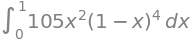

In [37]:
total_area = Integral(density, (x, 0, 1))
total_area

In [38]:
total_area.doit()

This confirms that the function f is a density.

Use Integral to find the chance that X is in any interval. Here is P(0.2<X<0.4).

In [39]:
prob_02_04 = Integral(density, (x, 0.2, 0.4)).doit()
prob_02_04

To get the indefinite integral, integrate the density and there are no limits of integration.

In [40]:
indefinite = Integral(density).doit()
indefinite

In [41]:
I_0 = indefinite.subs(x, 0)
I_0

In [42]:
cdf = indefinite - I_0
cdf

To find the value of the cdf at a specified point, say 0.4, we have to substitute x with 0.4 in the formula for the cdf.

In [43]:
cdf_at_04 = cdf.subs(x, 0.4)
cdf_at_04

Calulating P(0.2<X<0.4)

In [44]:
cdf_at_02 = cdf.subs(x, 0.2)
cdf_at_04 - cdf_at_02

# Expected Value
The expectation E(X) is a definite integral from 0 to 1

In [45]:
expectation = Integral(x*density, (x, 0, 1)).doit()
expectation

In [46]:
expected_square = Integral((x**2)*density, (x, 0, 1)).doit()
expected_square

Finding SD(X).

In [47]:
sd = (expected_square - expectation**2)**0.5
sd

# Joint, Marginal and Conditional Densities of Contenous Random Variable

Let random variables X and Y have the joint density defined by

f(x,y) = {30(y−x)4,   0<x<y<1
          
          0        otherwise

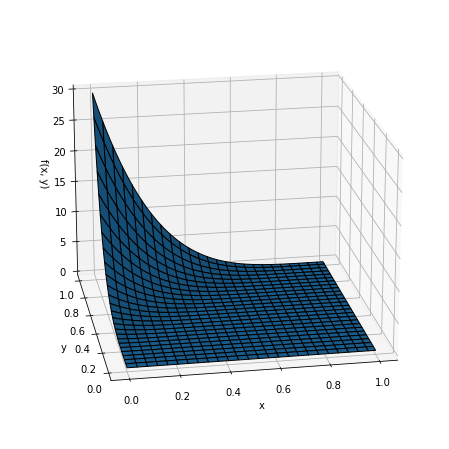

In [48]:
def jt_dens(x,y):
    if y < x:
        return 0
    else:
        return 30 * (y-x)**4

Plot_3d(x_limits=(0,1), y_limits=(0,1), f=jt_dens, cstride=4, rstride=4)


Defining the function f as a joint density

In [49]:
print('Defining Joint Density')
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)

joint_density = 30*(y-x)**4

Defining Joint Density


In [50]:
print('Total Area under the Curve')
Integral(joint_density, (y, x, 1), (x, 0, 1)).doit()

Total Area under the Curve


In [51]:
#Extracting Marginal Density of X

the density of X is given by

fX(x) = ∫yf(x,y)dy     for all x

By analogy with the discrete case, fX is sometimes called the marginal density of X.

In our example, the possible values of (X,Y) are the upper left hand triangle as shown above. So for each fixed x, the possible values of Y go from x to 1.

Therefore for 0<x<1, the density of X is given by

fX(x)=∫1x30(y−x)4dy=30⋅15(y−x)5∣∣1x=6(1−x)5

Here is the joint density surface again. You can see that X is much more likely to be near 0 than near 1.

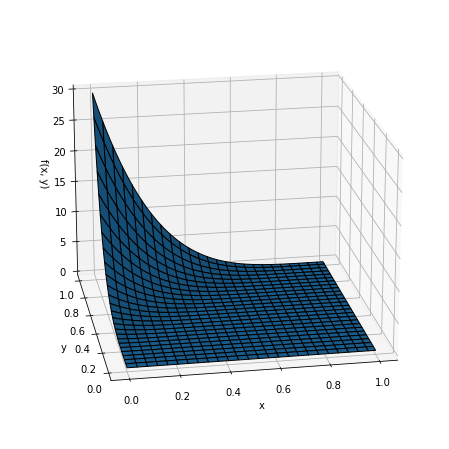

In [52]:
Plot_3d(x_limits=(0,1), y_limits=(0,1), f=jt_dens, cstride=4, rstride=4)
plt.show()

#Extracting Marginal Density of Y

Correspondingly, the density of Y can be found by fixing y and integrating over x as follows:

fY(y)=∫xf(x,y)dx    for all y

In our example, the joint density surface indicates that Y is more likely to be near 1 than near 0, which is confirmed by calculation. Remember that y>x and therefore for each fixed y, the possible values of x are 0 through y.

For 0<y<1,

fY(y) = ∫y030(y−x)4dx = 6y5

# Conditional Densities

Consider the conditional probability P(Y∈dy∣X∈dx). 

In [53]:
y = Symbol('y', positive=True)

conditional_density_Y_given_X_is_04 = (5/(0.6**5)) * (y - 0.4)**4

Integral(conditional_density_Y_given_X_is_04, (y, 0.4, 1)).doit()

In [54]:
Integral(conditional_density_Y_given_X_is_04, (y, 0.9, 1)).doit()

In [55]:
Integral(y*conditional_density_Y_given_X_is_04, (y, 0.4, 1)).doit()

# Another Example of Joint, Marginal and Conditional Densities

In [56]:
def joint(x,y):
    if y < x:
        return 0
    else:
        return 120 * x * (y-x) * (1-y)

In [57]:
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)

f = 120*x*(y-x)*(1-y)
f

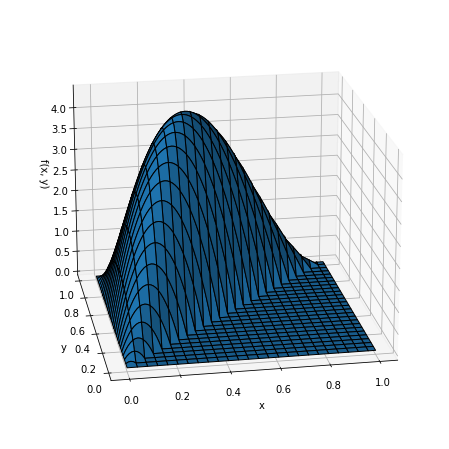

In [58]:
Plot_3d(x_limits=(0,1), y_limits=(0,1), f=joint, cstride=4, rstride=4)

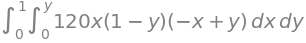

In [59]:
Integral(f, (x, 0, y), (y, 0, 1))

In [60]:
Integral(f, (x, 0, y), (y, 0, 1)).doit()

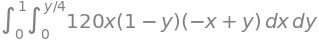

In [61]:
Integral(f, (x, 0, y/4), (y, 0, 1))

In [62]:
Integral(f, (x, 0, y/4), (y, 0, 1)).doit()

In [63]:
#Expected Value

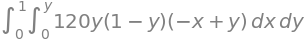

In [64]:
ev_y_over_x = Integral((y/x)*f, (x, 0, y), (y, 0, 1))
ev_y_over_x

In [65]:
ev_y_over_x.doit()